In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from pylab import rcParams
from datetime import datetime, timedelta
rcParams['figure.figsize']= 20, 5
import warnings
warnings.filterwarnings('ignore','No frequency information was')

In [2]:
df=pd.read_csv('D:\\Data_sets\\time_series\\ice_cream.csv')
df

,DATE,IPN31152N
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636
...,...,...
572,2019-09-01,100.1741
573,2019-10-01,90.1684
574,2019-11-01,79.7223
575,2019-12-01,75.7094


In [3]:
df.rename(columns={'DATE': 'date', 'IPN31152N': 'units'}, inplace=True)

In [4]:
#convert date column to datetime type
df['date'] = pd.to_datetime(df.date)

In [5]:
#set date as index
df.set_index('date', inplace=True)

In [6]:
df

,units
date,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636
...,...
2019-09-01,100.1741
2019-10-01,90.1684
2019-11-01,79.7223


In [72]:
ts = df['units']
ts.head(10)

date
2010-01-01     91.2895
2010-02-01    110.4994
2010-03-01    127.0971
2010-04-01    132.6468
2010-05-01    134.5576
2010-06-01    143.9519
2010-07-01    128.8566
2010-08-01    125.5563
2010-09-01    116.0686
2010-10-01     97.7520
Name: units, dtype: float64

In [7]:
# get data from 2010 onwards

In [8]:
start_date=pd.to_datetime('2010-01-01')

In [73]:
ts=ts[start_date:]

In [75]:
ts

date
2010-01-01     91.2895
2010-02-01    110.4994
2010-03-01    127.0971
2010-04-01    132.6468
2010-05-01    134.5576
                ...   
2019-09-01    100.1741
2019-10-01     90.1684
2019-11-01     79.7223
2019-12-01     75.7094
2020-01-01     83.6290
Name: units, Length: 121, dtype: float64

Text(0, 0.5, 'Production')

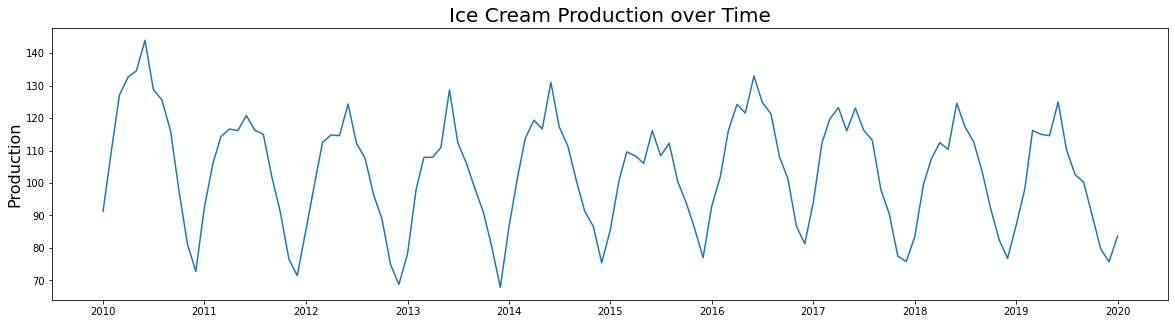

In [76]:
plt.plot(ts)
plt.title('Ice Cream Production over Time', fontsize=20)
plt.ylabel('Production', fontsize=16)

## PACF

In [11]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

C:\ProgramData\Anaconda3\envs\time_series\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


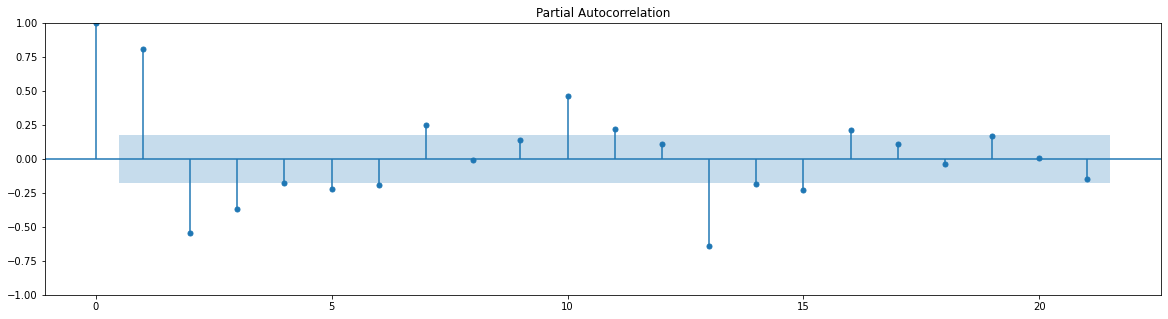

In [77]:
plot_pacf(ts)
plt.show()

In [13]:
## Based on PACF, we should start with an Auto Regressive model with lags 1, 2, 3, 10, 13

### Get training and testing data

In [14]:
train_end= datetime(2018,12,1)

In [15]:
test_end= datetime(2019,12,1)

In [79]:
train_data = ts[:train_end]
test_data = ts[train_end + timedelta(days=1):test_end]

In [80]:
test_data

date
2019-01-01     86.9988
2019-02-01     98.1116
2019-03-01    116.1718
2019-04-01    114.9703
2019-05-01    114.5613
2019-06-01    124.9605
2019-07-01    110.2632
2019-08-01    102.6085
2019-09-01    100.1741
2019-10-01     90.1684
2019-11-01     79.7223
2019-12-01     75.7094
Name: units, dtype: float64

## fitting AR model

In [25]:
from statsmodels.tsa.arima.model import ARIMA

In [81]:
# define model
model = ARIMA(train_data, order=(3,0,0))

C:\ProgramData\Anaconda3\envs\time_series\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\envs\time_series\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\envs\time_series\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [82]:
model_fit = model.fit()

In [83]:
#summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  units   No. Observations:                  108
Model:                 ARIMA(3, 0, 0)   Log Likelihood                -374.085
Date:                Tue, 30 Nov 2021   AIC                            758.170
Time:                        15:11:07   BIC                            771.580
Sample:                    01-01-2010   HQIC                           763.607
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        103.5743      2.169     47.761      0.000      99.324     107.825
ar.L1          1.0469      0.102     10.256      0.000       0.847       1.247
ar.L2         -0.0523      0.175     -0.298      0.7

In [84]:
## use lag1, and lag3

In [85]:
#get prediction start and end dates
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [86]:
#get the predictions and residuals
predictions = model_fit.predict(start=pred_start_date, end=pred_end_date)
residuals = test_data - predictions

In [90]:
# plt.figure(figsize=(10,4))
# plt.plot(residuals)
# plt.title('Residuals from AR Model', fontsize=20)
# plt.ylabel('Error', fontsize=16)
# plt.axhline(0, color='r', linestyle='--', alpha=0.2)

Text(0, 0.5, 'Sales')

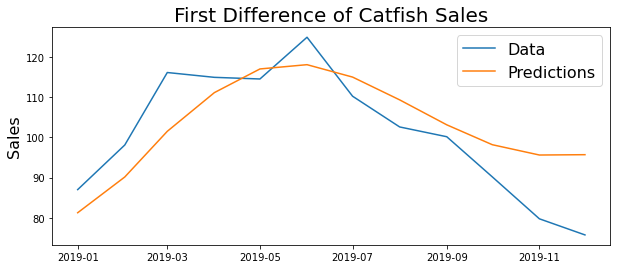

In [91]:
plt.figure(figsize=(10,4))

plt.plot(test_data)
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('First Difference of Catfish Sales', fontsize=20)
plt.ylabel('Sales', fontsize=16)

In [92]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error: 9.884158751162191


In [93]:
## on avg. we average 10 units producton away